# Интерполяция (часть 2)




### Чувствительность интерполяции

До сих пор мы считали, что значения функции $f(x)$ в узлах интерполяции заданы точно. На практике в значениях $f(x)$ присутствуют ошибки, свзяанные, например, с погрешностью измерения функции $f(x)$. В любом случае, при представлении в вычислительной технике $f(x_i)$ всегда содержит ошибку округления.

Для исследования чувствительности интерполяции удобно записывать интерполяционный многочлен в форме Лагранжа
$$
P(x) = \sum_{i=1}^n f(x_i)\ell_i(x).
$$

При возмущении значений в узлах на $\Delta f(x_i)$ интерполяционный многочлен изменяется
$$
\tilde P(x) = \sum_{i=1}^n \left[f(x_i) + \Delta f(x_i)\right]\ell_i(x).
$$

### Ошибка чувствительности интерполяции

Разность $|\tilde P(x) - P(x)|$ будем называть *ошибкой чувствительности интерполяции*
$$
|\tilde P(x) - P(x)| = \left|\sum_{i=1}^n \Delta f(x_i) \ell_i(x)\right|.
$$
Предположим, что все $|\Delta f(x_i)| \leqslant \Delta f$. Тогда
$$
|\tilde P(x) - P(x)| \leqslant \Delta f \sum_{i=1}^n |\ell_i(x)|.
$$
Функция $L(x) = \sum_{i=1}^n |\ell_i(x)|$ называется функцией Лебега и зависит только от расположения узлов.

### Функция Лебега
Заметим, что
$$
L(x) = \sum_{i=1}^n |\ell_i(x)| \geqslant \left|\sum_{i=1}^n \ell_i(x)\right| = 1,
$$
то есть максимальная погрешность между узлами не меньше погрешности в самих узлах.

Величина $L = \max_{x \in [a,b]} L(x)$ называется константой Лебега.

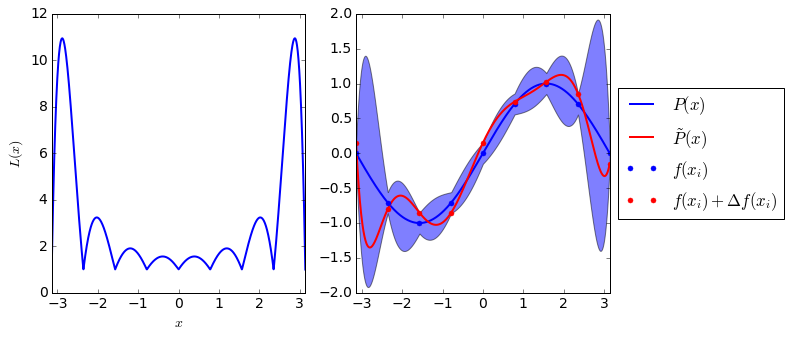

In [17]:
def ell(i, x, xs):
    A = np.array([(x-xs[k])/(xs[i]-xs[k]) for k in range(len(xs)) if i != k])
    return np.prod(A, axis=0)

def L(x, xs):
    return np.sum([np.abs(ell(i, x, xs)) for i in range(len(xs))], axis=0)

X = np.linspace(-np.pi, np.pi, 1000)
x = np.linspace(-np.pi, np.pi, 9)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1);
plt.plot(X, L(X, x), lw=2)
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.xlim(-np.pi, np.pi)
plt.ylim(0, None)

fv = np.sin(x)
delta = 0.15
fvs = fv + delta * np.tanh(10 * np.random.rand(len(fv)) - 5)

plt.subplot(1, 2, 2);
F = divided_differences(x, fv)
Fs = divided_differences(x, fvs)
plt.plot(X, evaluate(x, F, X), 'b', label='$P(x)$', lw=2)
up = evaluate(x, F, X) + delta * L(X, x)
down = evaluate(x, F, X) - delta * L(X, x)
plt.fill_between(X, down, up, alpha = 0.5)
plt.plot(X, evaluate(x, Fs, X), 'r', label='$\\tilde P(x)$', lw=2)
plt.plot(x, fv, 'b.', label='$f(x_i)$', ms=10)
plt.plot(x, fvs, 'r.', label='$f(x_i) + \\Delta f(x_i)$', ms=10)
plt.xlim(-np.pi, np.pi)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

plt.show()

### Рост констант Лебега

Для *равномерной* сетки константа Лебега зависит только от числа узлов
* Для линейной интерполяции ($n = 2$) константа Лебега $L = 1$.
* Для квадратичной интерполяции ($n = 3$) константа Лебега $L = 1.25$.
* При $n = 10$ константа Лебега $L \approx 19$.
* При $n = 20$ константа Лебега $L \approx 6900$.
* При $n = 30$ константа Лебега $L \approx 4 \cdot 10^6$.
* При $n \gg 1$ константа Лебега растет как $L \sim \frac{2^n}{e (n-1) \ln (n-1)}$

Напротив, для сетки из нулей многочлена Чебышева (которая минимизирует ошибку интерполяции), константа Лебега оказывается довольно малой:

* Для линейной интерполяции ($n = 2$) константа Лебега $L = \sqrt{2}$.
* Для квадратичной интерполяции ($n = 3$) константа Лебега $L = 5/3 \approx 1.6667$.
* При $n = 10$ константа Лебега $L \approx 2.4288$.
* При $n = 20$ константа Лебега $L \approx 2.8698$.
* При $n = 30$ константа Лебега $L \approx 3.1278$.
* В общем случае $\frac{2}{\pi} \ln n + 0.96 < L < \frac{2}{\pi} \ln n + 1$

Для случайной сетки константа Лебега может быть сколь угодно большой: рассмотрим сетку из трех узлов, где $x_2 - x_1 \ll x_3 - x_2$.

Тогда функция Лебега такой сетки зависит от отношения $K = \frac{x_3 - x_2}{x_2 - x_1}$. Для равномерной сетки $K = 1$ и $L = 1.25$.

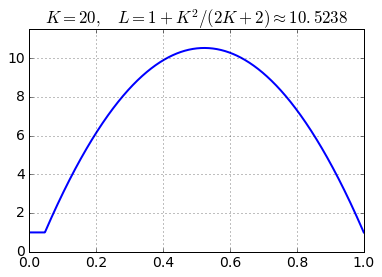

In [41]:
K = 20
x = np.linspace(0, 1, 1000)
plt.plot(x, ((1+K)**2*np.abs(x-1)*np.abs(x)+(K*np.abs(x-1)+np.abs(x))*np.abs(x-1+K*x))/K, lw=2)
Lv = 1 + 0.5 * K**2 / (1 + K)
plt.ylim(0, Lv+1)
plt.title('$K = %g,\\quad L = 1 + K^2 / (2K+2) \\approx %g$' % (K, Lv))
plt.grid()
plt.show()

### Сплайн-интерполяция
При интерполяции единым многочленом для большой равномерной сетки возникают проблемы
* Интерполяционный многочлен не обязан хорошо приближать функцию (пример Рунге).
* Интерполянт чувствителен к погрешностям в узлах, при $n > 50$ не хватает даже машинной точности.

Данные проблемы решаются переходом к кусочно-многочленным интерполянтам &mdash; сплайнам.

### Сплайн
Для сетки $[x_0, x_1, \dots, x_n]$ сплайн задается в виде $n$ функций $s_i(x)$:
$$
s(x) = s_i(x), \; x \in [x_{i-1}, x_i], \qquad i = 1, 2, \dots, n.
$$
В узлах интерполяции $x_i$ сплайн принимает заданные значения $f(x_i)$:
$$
s(x_i) = s_i(x_i) = s_{i+1}(x_i) = f(x_i)
$$

### Характеристики сплайна
Сплайн характеризуется следующими параметрами:
* Степень &mdash; это степень многочленов $s_i(x)$
* Гладкость &mdash; это количество непрерывных производных у $s(x)$
* Дефект &mdash; это разность между степенью и гладкостью.

Легко показать, что условие &laquo;дефект = 0&raquo; приводит к тому, что все $s_i(x)$ совпадают, а сплайн превращается в интерполяционный многочлен.

### Кусочно линейная аппроксимация
Простейший сплайн имеет степень 1 и гладкость 0 &mdash; это приближение функции кусочно-линейной ломанной:

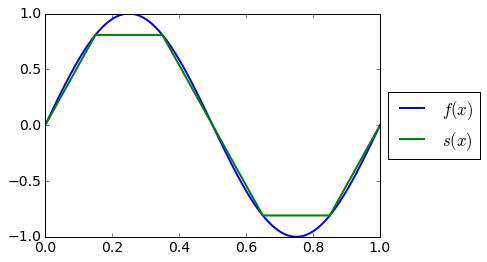

In [48]:
x = np.linspace(0, 1, 1000)
xs = np.array([0, 0.15, 0.35, 0.65, 0.85, 1])
plt.plot(x, np.sin(2*np.pi*x), lw=2, label='$f(x)$')
plt.plot(xs, np.sin(2*np.pi*xs), lw=2, label='$s(x)$')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

## Кубический сплайн дефекта 1
Каждая функция $s_i(x)$ определяется черырьмя параметрами
$$
s_i(x) = a_i + b_i(x - x_i) + \frac{c_i}{2} (x - x_i)^2 + \frac{d_i}{6} (x - x_i)^3,\\
a_i = s_i(x_i), \;\;
b_i = s_i'(x_i), \;\;
c_i = s_i''(x_i), \;\;
d_i = s_i'''(x_i).
$$

На данный сплайн наложены условия ($4n-2$ штуки)
$$
s_i(x_{i-1}) = f(x_{i-1}),\;\; s_i(x_i) = f(x_i), \quad i = 1, 2, \dots, n\\
s_i'(x_i) = s_{i+1}'(x_{i}),\;\; s_i''(x_i) = s_{i+1}''(x_{i}), \quad i = 1, 2, \dots, n-1
$$

### Граничные условия для сплайна
У сплайна остаются два свободных параметра, их определяют из различных граничных условий, например
* $s_1'(x_0) = f'(x_0),\;\; s_n'(x_n) = f'(x_n)$
* $s_1''(x_0) = f''(x_0),\;\; s_n''(x_n) = f''(x_n)$
* «Естественный» сплайн: $s_1''(x_0) = s_n''(x_n) = 0$

### Построение сплайна
Существует несколько способов определения функций $s_i(x)$ для кубического сплайна, все они сводят задачу к решению трехдиагональной системы. 

Рассмотрим вспомогательную задачу: определить $s_i(x)$ из условий
$$
s_i(x_{i-1}) = f_{i-1}\\
s_i(x_{i}) = f_{i}\\
s_i'(x_{i-1}) = m_{i-1}\\
s_i'(x_{i}) = m_{i}
$$
Эта задача называется задачей Эрмитовой интерполяции.

### Эрмитов элемент
Решая задачу построения кубического сплайна Эрмита, получаем
$$
s_i(x) = f_i + m_i(x - x_i) + \frac{2m_i + m_{i-1} - 3f(x_{i-1},x_i)}{x_i - x_{i-1}}(x-x_i)^2+\frac{m_i + m_{i-1} - 2f(x_{i-1},x_i)}{(x_i - x_{i-1})^2}(x-x_i)^2
$$

Составляя сплайн из Эрмитовых элементов мы сразу можем обеспечить непрерывность первой производной, задавая $m_i$ в каждом узле. Сами значения $m_i$ ($n+1$ штука) нужно определить из условия непрерывности второй производной и граничных условий.

### Система для $m_i$
Условие $s_i''(x_i) = s_{i+1}''(x_i)$ для соседних Эрмитовых элементов превращается в
$$
\frac{2m_i + m_{i-1} - 3f(x_{i-1},x_i)}{h_{i-1/2}} = 
-\frac{2m_i + m_{i+1} - 3f(x_i,x_{i+1})}{h_{i+1/2}}\\
\frac{m_{i-1}}{h_{i-1/2}} + 
\left(
\frac{2}{h_{i-1/2}} +
\frac{2}{h_{i+1/2}}
\right)m_i +
\frac{m_{i+1}}{h_{i+1/2}}
= 3 \left(
\frac{f(x_{i-1},x_i)}{h_{i-1/2}} + 
\frac{f(x_i,x_{i+1})}{h_{i+1/2}}
\right),
$$
что является трехдиагональной системой при $i = 1, \dots, n-1$. Здесь $h_{i-1/2} = x_i - x_{i-1}$.

### Граничные условия
Для естественного сплайна
$$
\frac{s_1''(x_0)}{2} = -\frac{2m_1 + m_0 - 3f(x_0, x_1)}{h_{1/2}} = 0, \qquad
\frac{s_n''(x_n)}{2} = \frac{2m_n + m_{n-1} - 3f(x_{n-1}, x_n)}{h_{n-1/2}} = 0\\
$$
дают граничные уравнения в системе
$$
\frac{m_0 + 2m_1}{h_{1/2}} = 3\frac{f(x_0, x_1)}{h_{1/2}}\\
\frac{2m_{n} + m_{n-1}}{h_{n-1/2}} = 3\frac{f(x_{n-1}, x_n)}{h_{n-1/2}}.
$$
Матрица такой системы будет симметричной и положительно определенной.

In [79]:
from scipy.linalg import solveh_banded

def cubic_spline(x, f):
    h = np.diff(x)
    n = len(h)
    df = np.diff(f) / h # Разделенные разности
    ab = np.zeros((2, n+1))
    b = np.zeros(n+1)
    ab[0, :n] = 2 / h; ab[0, 1:] += 2 / h
    ab[1, :n] = 1 / h
    b[:n] = 3 * df / h; b[1:] += 3 * df / h
    return solveh_banded(ab, b, lower=True)

def hermite(f1,m1,f2,m2,x1,x2,x):
    h = x2-x1; fd = (f2-f1)/h; dx = x-x2;
    return f2+m2*dx+(-3*fd+m1+2*m2)*dx**2/h + (m1+m2-2*fd)*dx**3/h**2

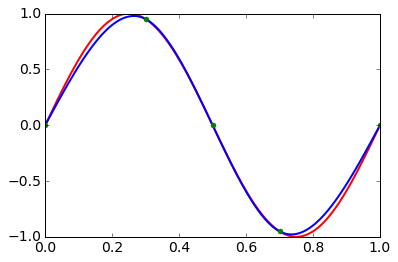

In [92]:
xs = np.array([0, .3, .5, .7, 1.]); ys = np.sin(2*np.pi*xs)
m = cubic_spline(xs, ys)
plt.plot(np.linspace(0, 1, 1000), np.sin(np.linspace(0, 2*np.pi, 1000)), 'r', lw=2)
for i in range(1, len(m)):
    x = np.linspace(xs[i-1], xs[i])
    plt.plot(x, hermite(ys[i-1], m[i-1], ys[i], m[i], xs[i-1], xs[i], x), 'b', lw=2)
plt.plot(xs, ys, 'g.', ms=10)
plt.show()